####Importing Libraries

In [1]:
import pandas as pd
import numpy as np

Load the dataset

In [2]:
file_path = "Loan_default.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully")
print("Shape:", df.shape)

Dataset loaded successfully
Shape: (255347, 18)


####Display the first few rows

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

#### Check missing values

In [6]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0


####Statistical overview of numeric columns

In [7]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


#### Distribution of the target variable

In [10]:
target_column = "Default"  # change if your dataset uses a different name

df[target_column].value_counts()

,count
Default,
0,225694
1,29653


####And percentage:

In [11]:
df[target_column].value_counts(normalize=True) * 100

,proportion
Default,
0,88.387175
1,11.612825


####Separate numeric and categorical columns

In [12]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numeric_cols = df.select_dtypes(exclude=["object"]).columns

print("Categorical columns:")
print(categorical_cols)

print("\nNumeric columns:")
print(numeric_cols)


Categorical columns:
Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

Numeric columns:
Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')


##Data Cleaning & Preprocessing

```
# This is formatted as code
```



1. Separate target and features

In [14]:
target_column = "Default"

X = df.drop(columns=[target_column])
y = df[target_column]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (255347, 17)
Target shape: (255347,)


2.Identify numeric and categorical columns

In [15]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical columns:")
print(categorical_cols)

print("\nNumeric columns:")
print(numeric_cols)

Categorical columns:
['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

Numeric columns:
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']


3. Check missing values again

In [16]:
X.isnull().sum().sort_values(ascending=False)

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


4. Build preprocessing pipeline

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine both
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

5. Split into training and testing sets



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (204277, 17)
Test size: (51070, 17)


6. Quick validation of pipeline

In [19]:
X_train_processed = preprocessor.fit_transform(X_train)

print("Processed training shape:", X_train_processed.shape)

Processed training shape: (204277, 204308)


## Build your first Credit Risk Model (Logistic Regression)

1. Import the model and evaluation tools

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

2. Create the full pipeline (Preprocessing + Model)

In [21]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

3. Train the model

In [22]:
model.fit(X_train, y_train)
print("Model training completed")

Model training completed


4. Make predictions

In [23]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

5. Evaluate performance

In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     45139
           1       0.29      0.51      0.37      5931

    accuracy                           0.80     51070
   macro avg       0.61      0.67      0.62     51070
weighted avg       0.85      0.80      0.82     51070

Confusion Matrix:
[[37621  7518]
 [ 2921  3010]]
ROC AUC Score: 0.7531804315315817


6. Plot ROC Curve

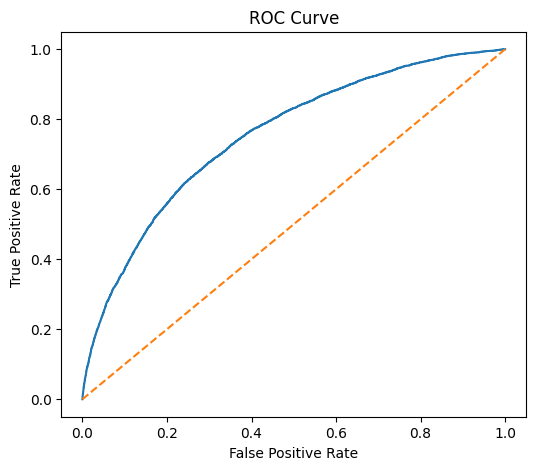

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

7. Add business meaning: Risk Score

In [26]:
df["Risk_Score"] = model.predict_proba(X)[:,1]

8. Create Risk Buckets (Business Segmentation)

In [27]:
df["Risk_Bucket"] = pd.qcut(
    df["Risk_Score"],
    q=4,
    labels=["Low Risk", "Medium Risk", "High Risk", "Very High Risk"]
)

df[["Risk_Score", "Risk_Bucket"]].head()

,Risk_Score,Risk_Bucket
0,0.094553,Low Risk
1,0.088642,Low Risk
2,0.751656,Very High Risk
3,0.408429,High Risk
4,0.259622,Medium Risk


9. Quick business summary table

In [28]:
risk_summary = df.groupby("Risk_Bucket").agg(
    Customers=("Default", "count"),
    Default_Rate=("Default", "mean"),
    Avg_Risk_Score=("Risk_Score", "mean")
)

print(risk_summary)

                Customers  Default_Rate  Avg_Risk_Score
Risk_Bucket                                            
Low Risk            63837      0.005075        0.094800
Medium Risk         63837      0.011404        0.209130
High Risk           63836      0.026834        0.354487
Very High Risk      63837      0.421198        0.637145


/tmp/ipython-input-2338816752.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_summary = df.groupby("Risk_Bucket").agg(


In [29]:
export_file = "credit_risk_with_scores.csv"
df.to_csv(export_file, index=False)

print(f"File saved as {export_file}")


File saved as credit_risk_with_scores.csv
